### Importing the required packages and loading the data

In [1]:
#importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Read in data into a dataframe
data = pd.read_csv(r"Dataset/Energy_and_Water_Data.csv")

#Display top of dataframe
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,...,Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,...,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,...,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840746,-73.942854,12.0,10.0,255.0,Washington Heights South ...
4,5,4778288,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,Not Available,...,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.841559,-73.942528,12.0,10.0,255.0,Washington Heights South ...


In [2]:
#No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
#Diplay upto 60 columns of a dataset
pd.set_option('display.max_columns', 60)
#Set default font size
plt.rcParams['font.size'] = 10
sns.set(font_scale = 1)
#Internal ipython tool for setting figure size
from IPython.core.pylabtools import figsize

In [3]:
#see the column data types and non-missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11746 entries, 0 to 11745
Data columns (total 60 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   Order                                                       11746 non-null  int64  
 1   Property Id                                                 11746 non-null  int64  
 2   Property Name                                               11746 non-null  object 
 3   Parent Property Id                                          11746 non-null  object 
 4   Parent Property Name                                        11746 non-null  object 
 5   BBL - 10 digits                                             11735 non-null  object 
 6   NYC Borough, Block and Lot (BBL) self-reported              11746 non-null  object 
 7   NYC Building Identification Number (BIN)                    11746 non-null  object 
 

### Convert data to correct types

In [4]:
#Replace all occurances of Not Available with numpy not a number
data = data.replace({"Not Available":np.nan})

for col in list(data.columns):
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data types to float
        data[col] = data[col].astype(float)

In [5]:
#Statistics for each column
data.describe()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,1.174400e+04,3741.000000,1484.000000,11746.000000,11746.000000,11746.000000,9642.000000,11583.000000,10281.000000,10959.000000,9783.000000,10281.000000,9.000000e+00,2.581000e+03,1.321000e+03,5.940000e+02,1.600000e+01,9.360000e+02,1.030400e+04,9.784000e+03,1.150200e+04,1.096000e+04,1.167200e+04,1.166300e+04,1.168100e+04,1.174600e+04,7.762000e+03,7762.000000,11583.000000,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1.605524e+05,22778.682010,12016.825270,1948.738379,1.289971,98.762557,59.854594,280.071484,309.747466,11.072643,1.901441,417.915709,3.395398e+06,3.186882e+06,5.294367e+06,2.429105e+06,1.193594e+06,2.868907e+08,5.048545e+07,5.364578e+05,5.965472e+06,1.768752e+06,4.553657e+03,2.477937e+03,2.076339e+03,1.673739e+05,1.591798e+04,136.172432,385.908029,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,3.095746e+05,55094.441422,27959.755486,30.576386,4.017484,7.501603,29.993586,8607.178877,9784.731207,127.733868,97.204587,10530.524339,2.213237e+06,5.497154e+06,5.881863e+06,4.442946e+06,3.558178e+06,3.124603e+09,3.914719e+09,4.022606e+07,3.154430e+07,9.389154e+06,2.041639e+05,1.954498e+05,5.931295e+04,3.189238e+05,1.529524e+05,1730.726938,9312.736225,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,5.400000e+01,0.000000,0.000000,1600.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.085973e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-4.690797e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.313430e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,6.520100e+04,4000.000000,1720.750000,1927.000000,1.000000,100.000000,37.000000,61.800000,65.100000,3.800000,0.100000,103.500000,1.663594e+06,2.550378e+05,2.128213e+06,0.000000e+00,5.698020e+04,4.320254e+06,1.098251e+06,1.176952e+04,1.043673e+06,3.019975e+05,3.287000e+02,1.474500e+02,9.480000e+01,6.699400e+04,2.595400e+03,27.150000,99.400000,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,9.132400e+04,8654.000000,5000.000000,1941.000000,1.000000,100.000000,65.000000,78.500000,82.500000,5.300000,0.500000,129.400000,4.328815e+06,1.380138e+06,4.312984e+06,0.000000e+00,2.070020e+05,9.931240e+06,4.103962e+06,4.445525e+04,1.855196e+06,5.416312e+05,5.002500e+02,2.726000e+02,1.718000e+02,9.408000e+04,4.692500e+03,45.095000,124.900000,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1.532550e+05,20000.000000,12000.000000,1966.000000,1.000000,100.000000,85.000000,97.600000,102.500000,9.200000,0.700000,167.200000,4.938947e+06,4.445808e+06,6.514520e+06,4.293825e+06,2.918332e+0

### Missing Values

In [6]:
# Function to calculate missing values by column
def missing_values_table(df):
    #Total missing values
    mis_val = df.isnull().sum()
    
    #percentage of missing values
    mis_val_percent = 100 * df.isnull().sum()/len(df)
    
    mis_val_table = pd.concat([mis_val,mis_val_percent],axis=1)
    
    #Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns = {0:'Missing Values', 1 : '% of Total Values'})
    
    #Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] !=0
    ].sort_values('% of Total Values', ascending = False).round(1)
    
    #print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) +
         " columns.\n"
         "There are " + str(mis_val_table_ren_columns.shape[0]) +
         " columns that have missing values.")
    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [7]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


In [8]:
missing_df = missing_values_table(data)
missing_columns = list(missing_df[missing_df['% of Total Values'] > 50].index)
print('we will remove %d columns.' % len(missing_columns))

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.
we will remove 11 columns.


In [9]:
# Drop the columns
data = data.drop(columns = list(missing_columns))

### Imputing missing values

In [10]:
numeric_subset = data.select_dtypes('number')
categorical_subset = data.select_dtypes('object')

In [11]:
categorical_subset.columns

Index(['Property Name', 'Parent Property Id', 'Parent Property Name',
       'BBL - 10 digits', 'NYC Borough, Block and Lot (BBL) self-reported',
       'NYC Building Identification Number (BIN)', 'Address 1 (self-reported)',
       'Postal Code', 'Street Number', 'Street Name', 'Borough',
       'Primary Property Type - Self Selected',
       'List of All Property Use Types at Property',
       'Largest Property Use Type', 'Metered Areas (Energy)',
       'Metered Areas  (Water)', 'Release Date', 'Water Required?',
       'DOF Benchmarking Submission Status', 'NTA'],
      dtype='object')

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
# Create an imputer object with a median filling strategy
num_imputer = SimpleImputer(strategy='median')

num_imputer.fit(numeric_subset)

num_data = num_imputer.transform(numeric_subset)
print("Missing values in numeric variables: ", np.isnan(num_data).sum())

Missing values in numeric variables:  0


In [14]:
# Create an imputer object with a mode filling strategy
cat_imputer = SimpleImputer(strategy='most_frequent')

cat_imputer.fit(categorical_subset)

cat_data = cat_imputer.transform(categorical_subset)

In [15]:
num_df = pd.DataFrame(num_data, columns =  numeric_subset.columns)

cat_df = pd.DataFrame(cat_data, columns = categorical_subset.columns)

mod_data = pd.concat([num_df, cat_df], axis=1)
mod_data.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
0,1.0,13286.0,289356.0,293447.0,1963.0,2.0,100.0,65.0,305.6,303.1,37.8,0.5,614.2,4.103962e+06,44455.25,3.813937e+07,11082770.50,6962.2,0.0,6962.2,762051.0,4692.5,45.095,619.4,40.750791,-73.973963,6.0,4.0,88.0,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,Office,Office,Office,Whole Building,Whole Building,05/01/2017 05:32:03 PM,No,In Compliance,Turtle Bay-East Midtown ...
1,2.0,28400.0,3693539.0,3889181.0,1969.0,12.0,100.0,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.40,3.323659e+08,96261312.10,55870.4,51016.4,4854.1,3889181.0,4692.5,45.095,404.3,40.841402,-73.942568,12.0,10.0,251.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
2,3.0,4778226.0,152765.0,231342.0,1924.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,231342.0,4692.5,45.095,124.9,40.840427,-73.940249,12.0,10.0,251.0,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
3,4.0,4778267.0,891040.0,1305748.0,1971.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,1305748.0,4692.5,45.095,124.9,40.840746,-73.942854,12.0,10.0,255.0,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
4,5.0,4778288.0,211400.0,179694.0,1932.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,179694.0,4692.5,45.095,124.9,40.841559,-73.942528,12.0,10.0,255.0,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Buildi

In [16]:
num_df = pd.DataFrame( num_data, columns =  numeric_subset.columns)
num_df.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract
0,1.0,13286.0,289356.0,293447.0,1963.0,2.0,100.0,65.0,305.6,303.1,37.8,0.5,614.2,4.103962e+06,44455.25,3.813937e+07,11082770.50,6962.2,0.0,6962.2,762051.0,4692.5,45.095,619.4,40.750791,-73.973963,6.0,4.0,88.0
1,2.0,28400.0,3693539.0,3889181.0,1969.0,12.0,100.0,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.40,3.323659e+08,96261312.10,55870.4,51016.4,4854.1,3889181.0,4692.5,45.095,404.3,40.841402,-73.942568,12.0,10.0,251.0
2,3.0,4778226.0,152765.0,231342.0,1924.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,231342.0,4692.5,45.095,124.9,40.840427,-73.940249,12.0,10.0,251.0
3,4.0,4778267.0,891040.0,1305748.0,1971.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,1305748.0,4692.5,45.095,124.9,40.840746,-73.942854,12.0,10.0,255.0
4,5.0,4778288.0,211400.0,179694.0,1932.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,179694.0,4692.5,45.095,124.9,40.841559,-73.942528,12.0,10.0,255.0


In [17]:
mod_data = pd.concat([num_df, cat_df], axis=1)
mod_data.head()

,Order,Property Id,DOF Gross Floor Area,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Latitude,Longitude,Community Board,Council District,Census Tract,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Metered Areas (Energy),Metered Areas (Water),Release Date,Water Required?,DOF Benchmarking Submission Status,NTA
0,1.0,13286.0,289356.0,293447.0,1963.0,2.0,100.0,65.0,305.6,303.1,37.8,0.5,614.2,4.103962e+06,44455.25,3.813937e+07,11082770.50,6962.2,0.0,6962.2,762051.0,4692.5,45.095,619.4,40.750791,-73.973963,6.0,4.0,88.0,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,10017,675,3 AVENUE,Manhattan,Office,Office,Office,Whole Building,Whole Building,05/01/2017 05:32:03 PM,No,In Compliance,Turtle Bay-East Midtown ...
1,2.0,28400.0,3693539.0,3889181.0,1969.0,12.0,100.0,55.0,229.8,228.8,24.8,2.4,401.1,9.330734e+08,9330734.40,3.323659e+08,96261312.10,55870.4,51016.4,4854.1,3889181.0,4692.5,45.095,404.3,40.841402,-73.942568,12.0,10.0,251.0,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,10032,180,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
2,3.0,4778226.0,152765.0,231342.0,1924.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,231342.0,4692.5,45.095,124.9,40.840427,-73.940249,12.0,10.0,251.0,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,10032,3975,BROADWAY,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
3,4.0,4778267.0,891040.0,1305748.0,1971.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,1305748.0,4692.5,45.095,124.9,40.840746,-73.942854,12.0,10.0,255.0,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Building,04/27/2017 11:23:27 AM,No,In Compliance,Washington Heights South ...
4,5.0,4778288.0,211400.0,179694.0,1932.0,1.0,100.0,65.0,78.5,82.5,5.3,0.5,129.4,4.103962e+06,44455.25,1.855196e+06,541631.25,0.0,0.0,0.0,179694.0,4692.5,45.095,124.9,40.841559,-73.942528,12.0,10.0,255.0,Neuro Institute,28400,NYP Columbia (West Campus),1021390085,1-02139-0085,1063403,710 West 168th Street,10032,193,FT WASHINGTON AVENUE,Manhattan,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Whole Building,Whole Buildi

In [18]:
mod_data.isnull().sum().sum()

0

### Exploratory Data Analysis

Text(0.5, 1.0, 'Energy Star Score Distribution')

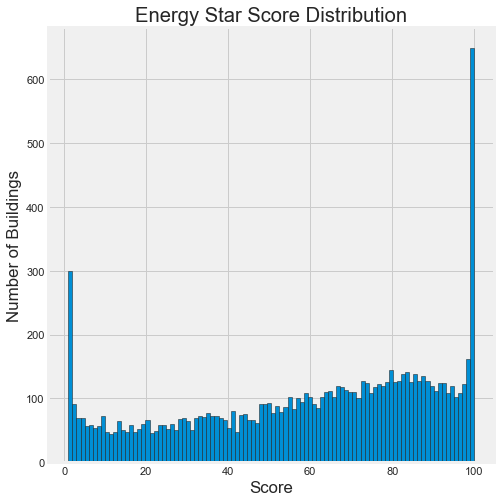

In [19]:
plt.figure(figsize=(8,8))

# Rename the socre
data = data.rename(columns = {'ENERGY STAR Score' : 'Score'})

# Histogram of the Energy Star Score
plt.style.use('fivethirtyeight')
plt.hist(data['Score'].dropna(), bins = 100, edgecolor = 'k')
plt.xlabel('Score')
plt.ylabel('Number of Buildings')
plt.title('Energy Star Score Distribution')

Text(0.5, 1.0, 'Site EUI Distribution')

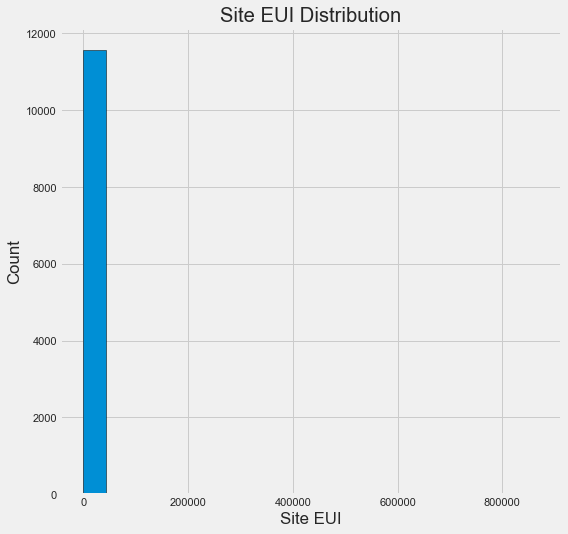

In [20]:
# Histogram plot of site EUI
plt.figure(figsize=(8,8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=20,edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [21]:
data['Site EUI (kBtu/ft²)'].describe()

count     11583.000000
mean        280.071484
std        8607.178877
min           0.000000
25%          61.800000
50%          78.500000
75%          97.600000
max      869265.000000
Name: Site EUI (kBtu/ft²), dtype: float64

In [22]:
data['Site EUI (kBtu/ft²)'].dropna().sort_values(ascending = False).head(10)

8068    869265.0
7       143974.4
3898    126307.4
8174    112173.6
8268    103562.7
3263     95560.2
8269     84969.6
3383     78360.1
3170     51831.2
3173     51328.8
Name: Site EUI (kBtu/ft²), dtype: float64

In [23]:
data.loc[data['Site EUI (kBtu/ft²)'] == 869265.0, :]

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
8068,9984,4414323,234 Skillman,Not Applicable: Standalone Property,Not Applicable: Standalone Property,3028937502,3028937502,"3390250 , 3338313",234 Skillman avenue,11211,234,SKILLMAN AVENUE,Brooklyn,61811.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,56900.0,2004,1,90,Whole Building,NaN,1.0,869265.0,939329.0,9.9,9393.0,986366.0,4.945919e+10,534458968.8,1983655.6,563239.6,2627199.1,2627015.0,184.1,56900.0,2547.9,44.78,912801.1,05/01/2017 11:34:14 PM,NaN,In Compliance,40.716233,-73.94141,1.0,34.0,477.0,East Williamsburg ...


In [24]:
# Calculate first and third quartile
first_quantile = data['Site EUI (kBtu/ft²)'].describe()['25%']
third_quantile = data['Site EUI (kBtu/ft²)'].describe()['75%']

# Interquartile range
iqr = third_quantile - first_quantile

#Remove outliers
data = data[(data['Site EUI (kBtu/ft²)'] > (first_quantile - 3 * iqr)) & 
            (data['Site EUI (kBtu/ft²)'] < (third_quantile + 3 * iqr))]

Text(0.5, 1.0, 'Site EUI Distribution')

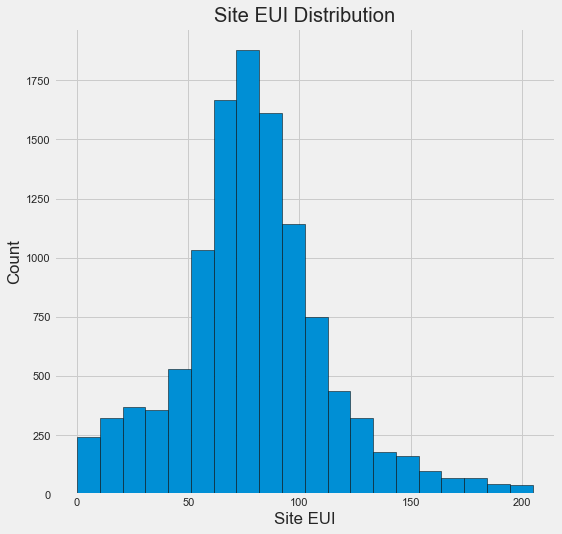

In [25]:
# Histogram plot of site EUI
plt.figure(figsize=(8,8))
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(),bins=20,edgecolor='black')
plt.xlabel('Site EUI')
plt.ylabel('Count')
plt.title('Site EUI Distribution')

In [26]:
data['Site EUI (kBtu/ft²)'].describe()

count    11319.000000
mean        79.086377
std         33.317277
min          0.000000
25%         61.200000
50%         77.800000
75%         95.800000
max        204.800000
Name: Site EUI (kBtu/ft²), dtype: float64

In [27]:
for col in cat_df:
    print('\nFrequency of categories for variable %s'%col)
    print(cat_df[col].value_counts())


Frequency of categories for variable Property Name
Club Quarters Hotel                   2
Clinton West Condominium              2
Main Hospital                         2
Jetro Cash && Carry                   2
Fairchild                             2
                                     ..
GVS Properties, LLC/559W164St         1
223 Lenox Road                        1
Carriage: 438 Clermont Ave (Child)    1
161-165 East 179th Street             1
Mercedes House- 770 11th Ave          1
Name: Property Name, Length: 11740, dtype: int64

Frequency of categories for variable Parent Property Id
Not Applicable: Standalone Property    11324
3612678                                   57
3616399                                   33
4985858                                   20
4440047                                   13
                                       ...  
4905873                                    1
4905373                                    1
3129218                                   

In [28]:
types = data.dropna(subset=['Score'])
types = types['Largest Property Use Type'].value_counts()
types = list(types[types.values > 100].index)
types

['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']

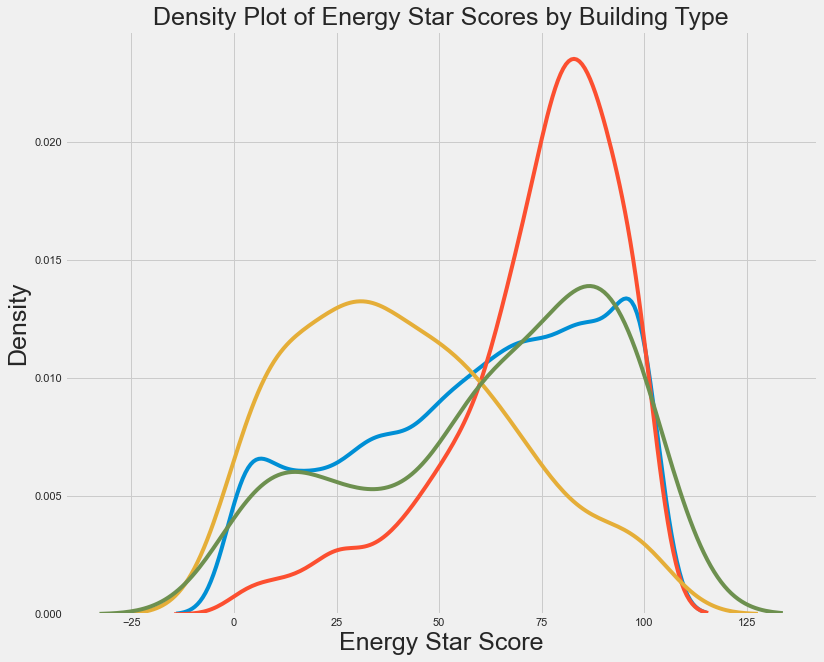

In [29]:
# Plot of distribution of scores for building categories

plt.figure(figsize=(12,10))

# plot each building
for b_type in types:
    #select the building type
    subset = data[data['Largest Property Use Type'] == b_type]
    # Density plot of Energy Star Scores
    sns.kdeplot(subset['Score'].dropna(),
               label = b_type, shade = False,
               alpha = 0.8)

# label the plot
plt.xlabel('Energy Star Score', size = 25)
plt.ylabel('Density', size = 25); 
plt.title('Density Plot of Energy Star Scores by Building Type', size = 25);

In [30]:
# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['Score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)
boroughs

['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']

Text(0.5, 1.0, 'Density plot of Energy Star Score by Borough')

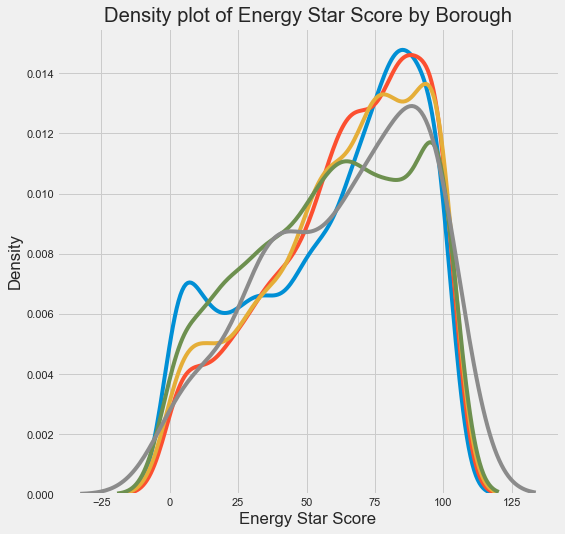

In [31]:
# Plot of distribution scores of boroughs

plt.figure(figsize=(8,8))

# Plot each borough
for b_borough in boroughs:
    subset = data[data['Borough'] == b_borough]
    sns.kdeplot(subset['Score'].dropna(),
               label = b_borough, shade = False,
               alpha = 0.8)

plt.xlabel("Energy Star Score")
plt.ylabel("Density")
plt.title("Density plot of Energy Star Score by Borough")

In [32]:
# Find all correlations and sort
correlations_data = data.corr()['Score'].sort_values()

# Print the most negative correlations
print(correlations_data.head(15), '\n')

# Print the most positive correlations
print(correlations_data.tail(15))

Site EUI (kBtu/ft²)                                          -0.723864
Weather Normalized Site EUI (kBtu/ft²)                       -0.713993
Weather Normalized Source EUI (kBtu/ft²)                     -0.645542
Source EUI (kBtu/ft²)                                        -0.641037
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.358394
Weather Normalized Site Natural Gas Intensity (therms/ft²)   -0.346046
Direct GHG Emissions (Metric Tons CO2e)                      -0.147792
Weather Normalized Site Natural Gas Use (therms)             -0.135211
Natural Gas Use (kBtu)                                       -0.133648
Year Built                                                   -0.121249
Total GHG Emissions (Metric Tons CO2e)                       -0.113136
Electricity Use - Grid Purchase (kBtu)                       -0.050639
Weather Normalized Site Electricity (kWh)                    -0.048207
Latitude                                                     -0.048196
Proper

In [33]:
numeric_subset = data.select_dtypes('number')

# Create columns with square root and log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'Score':
        next
    else:
        numeric_subset['sqrt_' + col] = np.sqrt(numeric_subset[col])
        numeric_subset['log_' + col] = np.log(numeric_subset[col])

# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

# Drop buildings without an energy star score
features = features.dropna(subset = ['Score'])

# Find correlations with the score 
correlations = features.corr()['Score'].dropna().sort_values()

C:\Users\Bhara\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bhara\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bhara\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
# Display most negative correlations
correlations.head(15)

Site EUI (kBtu/ft²)                                            -0.723864
Weather Normalized Site EUI (kBtu/ft²)                         -0.713993
sqrt_Site EUI (kBtu/ft²)                                       -0.699817
sqrt_Weather Normalized Site EUI (kBtu/ft²)                    -0.689019
sqrt_Weather Normalized Source EUI (kBtu/ft²)                  -0.671044
sqrt_Source EUI (kBtu/ft²)                                     -0.669396
Weather Normalized Source EUI (kBtu/ft²)                       -0.645542
Source EUI (kBtu/ft²)                                          -0.641037
log_Source EUI (kBtu/ft²)                                      -0.622892
log_Weather Normalized Source EUI (kBtu/ft²)                   -0.620329
log_Site EUI (kBtu/ft²)                                        -0.612039
log_Weather Normalized Site EUI (kBtu/ft²)                     -0.601332
log_Weather Normalized Site Electricity Intensity (kWh/ft²)    -0.424246
sqrt_Weather Normalized Site Electricity Intensity 

In [35]:
# Display most positive correlations
correlations.tail(15)

sqrt_Order                                                         0.028662
Borough_Queens                                                     0.029545
Largest Property Use Type_Supermarket/Grocery Store                0.030038
Largest Property Use Type_Residence Hall/Dormitory                 0.035407
Order                                                              0.036827
Largest Property Use Type_Hospital (General Medical & Surgical)    0.048410
Borough_Brooklyn                                                   0.050486
log_Community Board                                                0.055495
Community Board                                                    0.056612
sqrt_Community Board                                               0.058029
sqrt_Council District                                              0.060623
log_Council District                                               0.061101
Council District                                                   0.061639
Largest Prop

C:\Users\Bhara\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Bhara\anaconda3\lib\site-packages\seaborn\regression.py:580: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Energy Star Score vs Site EUI')

<Figure size 576x576 with 0 Axes>

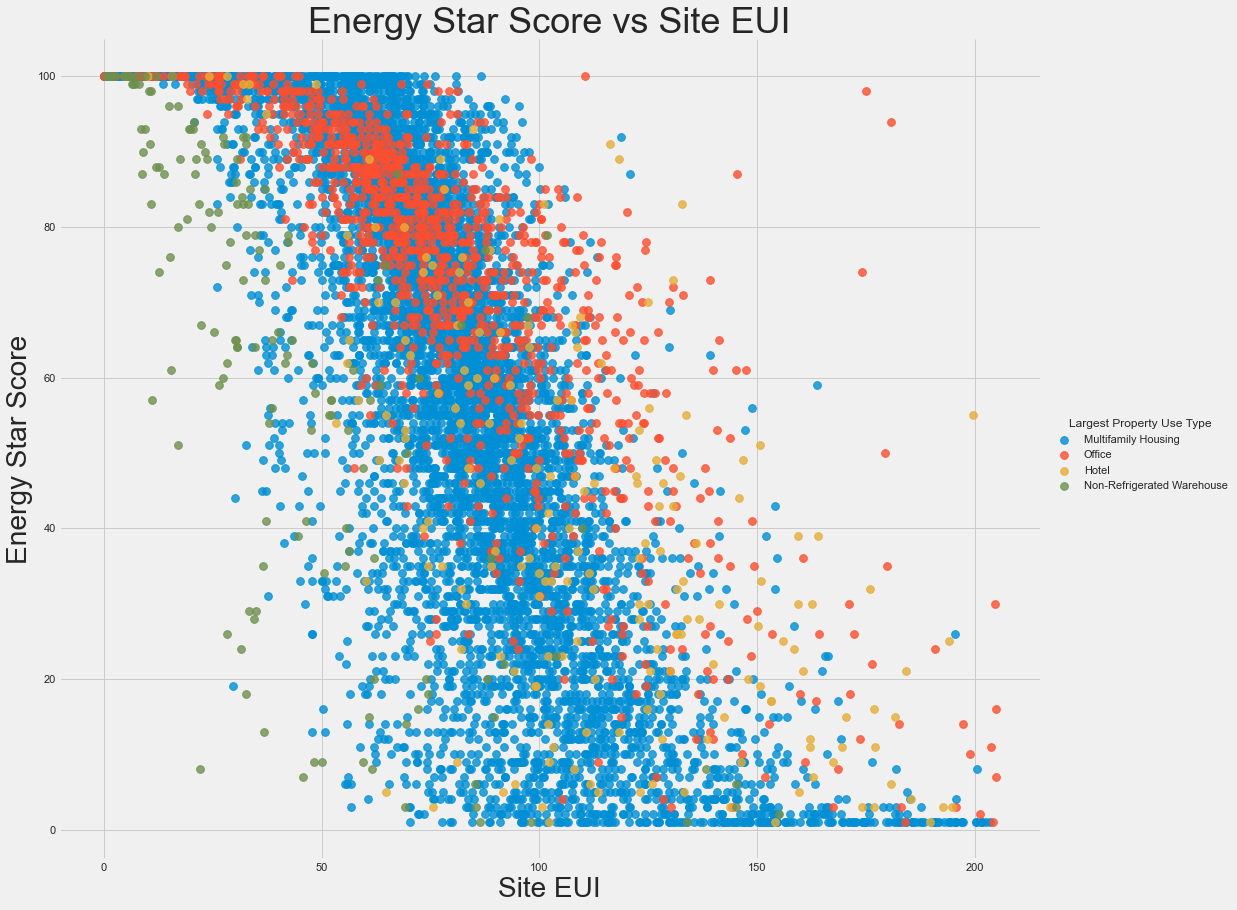

In [36]:
plt.figure(figsize=(8,8))

# Extract the building types
features['Largest Property Use Type'] = data.dropna(subset = ['Score'])['Largest Property Use Type']

# Limit to building types with more than 100 observations
features = features[features['Largest Property Use Type'].isin(types)]

# Use seaborn to plot a scatterplot of Score Vs Log Source EUI
sns.lmplot('Site EUI (kBtu/ft²)', 'Score', 
           hue = 'Largest Property Use Type',
          data = features,
          scatter_kws = {'alpha':0.8, 's':60},
          fit_reg = False, size = 12, aspect = 1.2)

# Plot labeling
plt.xlabel("Site EUI", size = 28)
plt.ylabel("Energy Star Score", size = 28)
plt.title("Energy Star Score vs Site EUI", size = 36)

C:\Users\Bhara\anaconda3\lib\site-packages\seaborn\axisgrid.py:1152: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))


Text(0.5, 1.02, 'Pairs Plot of Engery Data')

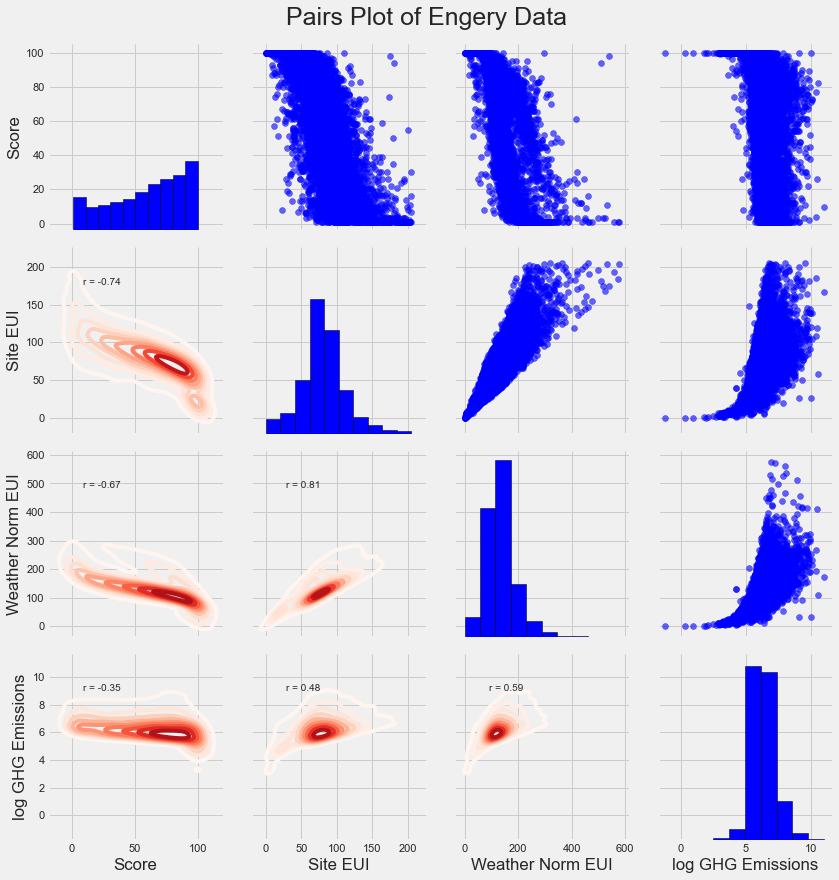

In [37]:
# Extract the columns to  plot
plot_data = features[['Score', 'Site EUI (kBtu/ft²)', 
                      'Weather Normalized Source EUI (kBtu/ft²)', 
                      'log_Total GHG Emissions (Metric Tons CO2e)']]

# Replace the inf with nan
plot_data = plot_data.replace({np.inf: np.nan, -np.inf: np.nan})

# Rename columns 
plot_data = plot_data.rename(columns = {'Site EUI (kBtu/ft²)': 'Site EUI', 
                                        'Weather Normalized Source EUI (kBtu/ft²)': 'Weather Norm EUI',
                                        'log_Total GHG Emissions (Metric Tons CO2e)': 'log GHG Emissions'})

# Drop na values
plot_data = plot_data.dropna()

# Function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy=(.2, .8), xycoords = ax.transAxes,
               size = 10)

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 3)

# Upper is a scatter plot
grid.map_upper(plt.scatter, color = 'blue', alpha = 0.6)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'blue', edgecolor = 'black')

# Bottom is correlation and density plot
grid.map_lower(corr_func)
grid.map_lower(sns.kdeplot,cmap = plt.cm.Reds)

#Title for entire plot
plt.suptitle('Pairs Plot of Engery Data', size = 25, y = 1.02)

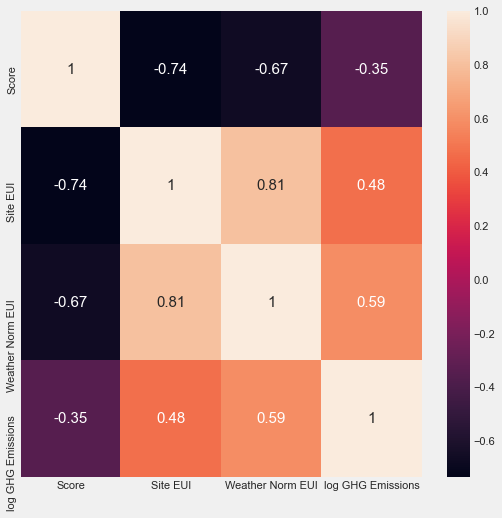

In [38]:
corr = plot_data.corr()
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(corr, vmax=1,annot_kws={'size': 15}, annot=True);

In [40]:
# we will limit the graph to building types that have 
# more than 100 observations in the dataset.
building_types = data.dropna(subset=['Score'])
building_types = building_types['Largest Property Use Type'].value_counts()
building_types = list(building_types[building_types.values > 100].index)
print("Buidling types with more than 100 observations ",building_types)

# Create a list of boroughs with more than 100 observations
boroughs = data.dropna(subset=['Score'])
boroughs = boroughs['Borough'].value_counts()
boroughs = list(boroughs[boroughs.values > 100].index)
print("Boroughs with more than 100 observations ",boroughs)

Buidling types with more than 100 observations  ['Multifamily Housing', 'Office', 'Hotel', 'Non-Refrigerated Warehouse']
Boroughs with more than 100 observations  ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island']


In [41]:
multivari_data = data[data['Largest Property Use Type'].isin(building_types) & 
                      data['Borough'].isin(boroughs)].dropna()
multivari_data.rename(columns = {'Largest Property Use Type':"BuildingType"}, 
                      inplace = True)
multivari_data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,BuildingType,Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
103,106,2741656,154 Haven Dormitory,3614737,Columbia University Medical Center,1021390275,1021390275,1063430,154 Haven Avenue,10032,154,HAVEN AVENUE,Manhattan,84442.0,Office,"Office, Other, Residence Hall/Dormitory",Office,52850.0,1970,1,100,Whole Building,Whole Building,81.0,85.6,89.8,9.8,0.0,161.7,49786.0,523.1,2898517.5,825719.4,589.9,320.9,269.0,84508.0,1753.4,20.75,159.6,05/02/2017 01:28:02 PM,No,In Compliance,40.845958,-73.942539,12.0,10.0,255.0,Washington Heights South ...
161,165,2809891,434 West 120th Street,3618216,435 W 119 and 434 W 120,1019620070,1019620070,1059514,434 West 120th Street,10027,1211,AMSTERDAM AVENUE,Manhattan,87979.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,89091.0,1967,1,100,Whole Building,Whole Building,100.0,17.2,17.2,1.2,0.1,26.5,1177500.0,11775.0,351340.5,105215.1,95.1,62.5,32.6,89091.0,2659.3,29.85,26.3,04/24/2017 06:52:20 PM,Yes,In Compliance,40.809066,-73.959408,9.0,7.0,20701.0,Morningside Heights ...
323,332,4414870,Dayton Towers: 76-00 Shore Front Parkway,4994297,1-50/76-00 Dayton Towers,4161280001,4-16128-0001,4457805,76-00 Shore Front Parkway,11692,7600,SHORE FRONT PARKWAY,Queens,545163.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,545163.0,1968,1,100,Whole Building,Whole Building,14.0,127.9,127.9,5.3,1.1,172.1,59909295.9,599093.0,9839866.9,2883899.7,4095.2,3182.1,913.1,545163.0,38482.8,70.59,172.1,04/29/2017 01:57:41 PM,Yes,In Compliance,40.586551,-73.803505,14.0,32.0,94203.0,Hammels-Arverne-Edgemere ...
327,336,4994375,Riverbend 2301-2311 (WW),4994371,Riverbend (WW),1017640001,1-01764-0001,1054345,2289-2311 5th Avenue,10037,2301,5 AVENUE,Manhattan,449973.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,449973.0,1970,1,95,Another configuration,Whole Building,98.0,21.6,20.9,5.6,0.0,61.9,821669.9,8216.7,8888560.3,2519793.7,868.5,43.6,824.9,449973.0,21970.3,48.83,63.9,05/01/2017 10:21:40 PM,Yes,In Compliance,40.815502,-73.935614,11.0,9.0,210.0,East Harlem North ...
407,423,2919954,Highmount Associates 2,5876774,Highmount Associates I & II,1004530011,1-00453-0011,1082513;1079353,304-310 East 12th Street,10003,304,EAST 12 STREET,Manhattan,101800.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,40320.0,1940,1,100,Whole Building,Whole Building,64.0,102.0,105.2,5.0,0.6,144.8,2262759.1,22627.6,703622.8,201380.9,270.5,205.2,65.3,40320.0,3192.5,79.18,142.4,05/01/2017 04:05:56 PM,Yes,In Compliance,40.730833,-73.985492,3.0,2.0,40.0,East Village ...


<Figure size 1440x864 with 0 Axes>

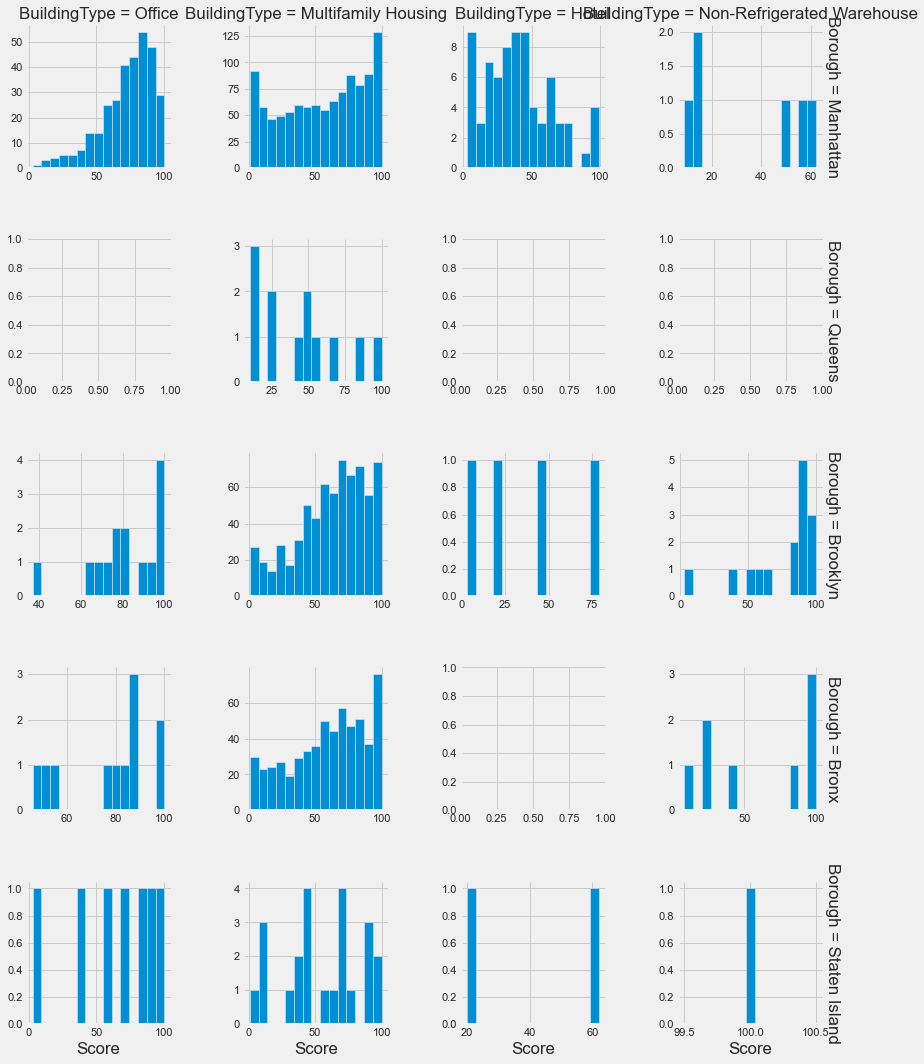

In [42]:
plt.figure(figsize=(20,12))
x=sns.FacetGrid(multivari_data, row='Borough',col = 'BuildingType',
                palette='husl',sharex=False,sharey=False, margin_titles=True)
x=x.map(plt.hist, 'Score', bins=15)
x=x.fig.subplots_adjust(wspace=0.5, hspace=0.5)

### Feature Engineering and Feature Selection

In [43]:
# Copy the original data
features = data.copy()

# Select the numeric columns
numeric_subset = data.select_dtypes('number')

# Create columns with log of numeric columns
for col in numeric_subset.columns:
    # Skip the Energy Star Score column
    if col == 'Score':
        next
    else:
        numeric_subset['log_' + col] = np.log(numeric_subset[col])
        
# Select the categorical columns
categorical_subset = data[['Borough', 'Largest Property Use Type']]

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset)

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)

features.shape

C:\Users\Bhara\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Bhara\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(11319, 110)

Text(0.5, 1.0, 'Weather Norm EUI vs Site EUI, R = 0.9968')

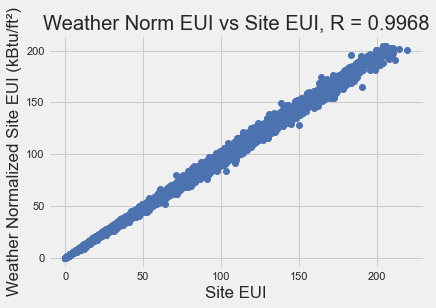

In [44]:
plot_data = data[['Weather Normalized Site EUI (kBtu/ft²)',
                 'Site EUI (kBtu/ft²)']].dropna()
plt.plot(plot_data['Weather Normalized Site EUI (kBtu/ft²)'],
        plot_data['Site EUI (kBtu/ft²)'], 'bo')
plt.xlabel('Site EUI')
plt.ylabel('Weather Normalized Site EUI (kBtu/ft²)')
plt.title('Weather Norm EUI vs Site EUI, R = %0.4f' 
          % np.corrcoef(data[['Weather Normalized Site EUI (kBtu/ft²)',
                             'Site EUI (kBtu/ft²)']].dropna(),rowvar=False)[0][1])

In [45]:
def remove_collinear_features(x, threshold):
    '''
    Objective:
        Remove collinear features in a dataframe with a correlation coefficient
        greater than the threshold. Removing collinear features can help a model
        to generalize and improves the interpretability of the model.
        
    Inputs: 
        threshold: any features with correlations greater than this value are removed
    
    Output: 
        dataframe that contains only the non-highly-collinear features
    '''
    
    # Dont want to remove correlations between Energy Star Score
    y = x['Score']
    x = x.drop(columns = ['Score'])
    
    # Calculate the correlation matrix
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterate through the correlation matrix and compare correlations
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            
            # If correlation exceeds the threshold
            if val >= threshold:
                # Print the correlated features and the correlation value
                # print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    # Drop one of each pair of correlated columns
    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Weather Normalized Site EUI (kBtu/ft²)', 
                          'Water Use (All Water Sources) (kgal)',
                          'log_Water Use (All Water Sources) (kgal)',
                          'Largest Property Use Type - Gross Floor Area (ft²)'])
    
    # Add the score back in to the data
    x['Score'] = y
               
    return x

In [46]:
# Remove the collinear features above a specified correlation coefficient
features = remove_collinear_features(features, 0.6)

In [47]:
# Remove any columns with all na values
features  = features.dropna(axis=1, how = 'all')
features.shape

(11319, 65)

In [48]:
features.shape

(11319, 65)

In [49]:
# Extracting the buildings with no scores and with a score

no_score = features[features['Score'].isna()]

score = features[features['Score'].notnull()]

print(no_score.shape)
print(score.shape)

(1858, 65)
(9461, 65)


In [51]:
from sklearn.model_selection import train_test_split
# Separate out the features and targets
features = score.drop(columns=['Score'])
target = pd.DataFrame(score['Score'])

# Replace the inf and -inf with nan (required for later imputation)
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Split into 70% training 30% testing set
X_train,X_test,y_train,y_test = train_test_split(features, target, 
                                                 test_size = 0.3, 
                                                 random_state=40)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6622, 64)
(2839, 64)
(6622, 1)
(2839, 1)


### Baseline

In [53]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

In [54]:
baseline_guess = np.median(y_train)

print('The baseline guess is a score of %0.2f' % baseline_guess)
print("Baseline Performance on the test set: MAE = %0.4f" % 
      mae(y_test, baseline_guess))

The baseline guess is a score of 66.00
Baseline Performance on the test set: MAE = 24.6714


In [55]:
#Save the no_scores, training,testing data
no_score.to_csv('no_score.csv', index = False)
X_train.to_csv('X_train.csv', index = False)
X_test.to_csv('X_test.csv', index = False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

In [56]:
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', 60)

# Matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Set default font size
plt.rcParams['font.size'] = 24

from IPython.core.pylabtools import figsize

# Seaborn for visualization
import seaborn as sns
sns.set(font_scale = 2)

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler


# Machine Learning Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor


In [58]:
# Read in data into dataframes
train_features = pd.read_csv('X_train.csv')
test_features = pd.read_csv('X_test.csv')
train_labels = pd.read_csv('y_train.csv')
test_labels = pd.read_csv('y_test.csv')

In [59]:
print("Training Feature Size: ", train_features.shape)
print("Testing Feature Size: ", test_features.shape)
print("Training Labels Size: ", train_labels.shape)
print("Testing Labels Size: ", test_labels.shape)

Training Feature Size:  (6622, 64)
Testing Feature Size:  (2839, 64)
Training Labels Size:  (6622, 1)
Testing Labels Size:  (2839, 1)


In [60]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a median filling strategy
imputer = SimpleImputer(strategy='median')

# Train on the training features
imputer.fit(train_features)

# Transform both training data and testing data
X = imputer.transform(train_features)
X_test = imputer.transform(test_features)

# Checking the missing values
print("Missing values in train: ", np.isnan(X).sum())
print("Missing values in test: ", np.isnan(X_test).sum())

Missing values in train:  0
Missing values in test:  0


In [61]:
from sklearn.preprocessing import MinMaxScaler

# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0,1))

# fit on the training data
scaler.fit(X)

# Transform both training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [62]:
# Function to calculate mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates 
#model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X, train_labels.values.ravel())
    
    # Make predictions and evaluate
    model_pred = model.predict(X_test)
    model_mae = mae(test_labels.values.ravel(), model_pred)
    
    # Return the performance metric
    return model_mae

In [63]:
Decision_tree = DecisionTreeRegressor()
DT_mae = fit_and_evaluate(Decision_tree)

print('Decision Regression Performance on the test set: MAE = %0.4f' % DT_mae)

Decision Regression Performance on the test set: MAE = 12.9877


In [64]:
random_forest = RandomForestRegressor(random_state=60)
random_forest_mae = fit_and_evaluate(random_forest)

print("Random Forest Regression Performance on the test set: MAE %0.4f" % random_forest_mae)

Random Forest Regression Performance on the test set: MAE 9.3922


In [65]:
svm_regressor = SVR(C = 1000, gamma=0.1)
svm_mae = fit_and_evaluate(svm_regressor)

print("SVM Regressor performance on the test set: MAE = %0.4f" % svm_mae)

SVM Regressor performance on the test set: MAE = 11.1635


In [66]:
knn = KNeighborsRegressor(n_neighbors=10)
knn_mae = fit_and_evaluate(knn)

print("KNN performance on the test set: MAE = %0.4f" % knn_mae)

KNN performance on the test set: MAE = 13.0357


Text(0.5, 1.0, 'Model Comparison on Test MAE')

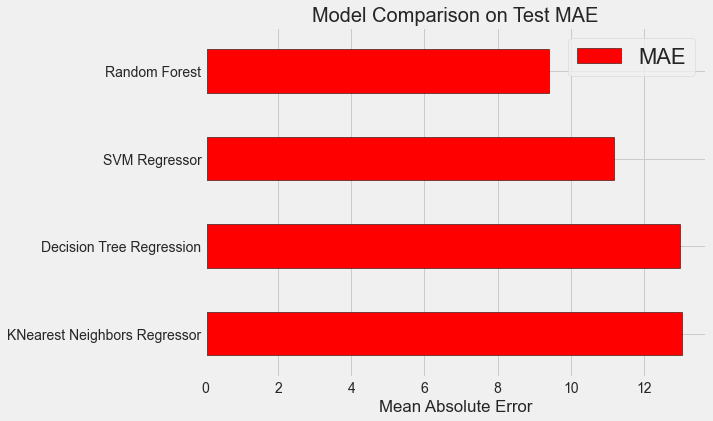

In [69]:
plt.style.use('fivethirtyeight')
figsize(8, 6)

# DataFrame to hold the results
model_comparison = pd.DataFrame({'model':['Decision Tree Regression', 'Random Forest', 
                                          'SVM Regressor','KNearest Neighbors Regressor'],
                                'MAE':[DT_mae, random_forest_mae, svm_mae, knn_mae]})

# Horizontal bar chart of test MAE
model_comparison.sort_values('MAE', ascending = False).plot(x = 'model', y = 'MAE', kind = 'barh',
                                                           color = 'red', edgecolor = 'black')

# plot formatting
plt.ylabel('')
plt.yticks(size = 14)
plt.xlabel('Mean Absolute Error')
plt.xticks(size = 14)
plt.title('Model Comparison on Test MAE', size = 20)

In [82]:
scores = pd.DataFrame()
scores['Feature_names'] = features.columns
scores['Feature_importances'] = random_forest.feature_importances_

scores.sort_values(by=['Feature_importances'], ascending=False).head(10)

,Feature_names,Feature_importances
6,Site EUI (kBtu/ft²),0.590255
7,Weather Normalized Site Electricity Intensity ...,0.152282
34,Largest Property Use Type_Multifamily Housing,0.058647
1,Property Id,0.021472
2,DOF Gross Floor Area,0.019765
14,log_Direct GHG Emissions (Metric Tons CO2e),0.018254
3,Year Built,0.017232
0,Order,0.015491
13,Census Tract,0.012429
36,Largest Property Use Type_Non-Refrigerated War...,0.012332
